In [132]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as smp
import math
import mpmath as mp
import random
import statistics as st

# testing git, nothing to see here

In [133]:
def probability(k, n, rho, i):
    # besseli_vec = np.frompyfunc(mp.besseli, 2, 1)
    prob = np.exp(-n*(1+1/rho))*(
        rho**((k-i)/2)*mp.besseli(k-i, 2*n/math.sqrt(rho))  +  
        rho**((k-i-1)/2)*mp.besseli(k+i+1, 2*n/math.sqrt(rho)) +
        (1-rho)*rho**k*mp.nsum(lambda j: rho**(-j/2)*mp.besseli(j, 2*n/math.sqrt(rho)), [k+i+2, mp.inf]))
    return prob

def constant(variable, constant):
    return constant

# euler = nsum(lambda x: 1/math.factorial(x), [0, inf])

In [134]:
def simulation(nSpace, rho, i):
  deltaN = nSpace[1] - nSpace[0]

  state = i
  finalSpace = np.zeros(len(nSpace))

  for nStep in range(len(nSpace)):
    if random.random() <= deltaN:
      state += 1
    elif (random.random() <= deltaN/rho) & (state!=0):
      state -= 1
      
    finalSpace[nStep] = state

  return finalSpace


In [135]:
def simulationStats(numSim, nSpace, rho, i):
  sims = list()
  for sim in range(numSim):
    newSim = simulation(nSpace, rho, i)
    sims.append(newSim)
  
  mean = np.zeros(len(nSpace))
  median = np.zeros(len(nSpace))
  mode = np.zeros(len(nSpace))
  SD = np.zeros(len(nSpace)) #standard deviation
  Q1 = np.zeros(len(nSpace)) 
  Q3 = np.zeros(len(nSpace)) 

  for nStep in range(len(nSpace)):
    custemersArray = [0]*numSim
    for index, sim in enumerate(sims):
      custemersArray[index] = sim[nStep]
    
    mean[nStep] = st.mean(custemersArray)
    median[nStep] = st.median(custemersArray)
    mode[nStep] = st.mode(custemersArray)
    SD[nStep] = np.std(custemersArray) # standard deviation based on 1/n, NOT 1/(n-1)
    Q1[nStep] = np.percentile(custemersArray, 25)
    Q3[nStep] = np.percentile(custemersArray, 75)

  return mean, median, mode, SD, Q1, Q3

In [147]:
rho = 3
i = 0
maxNumberN = 500

Text(0, 0.5, 'Počet zákazníků')

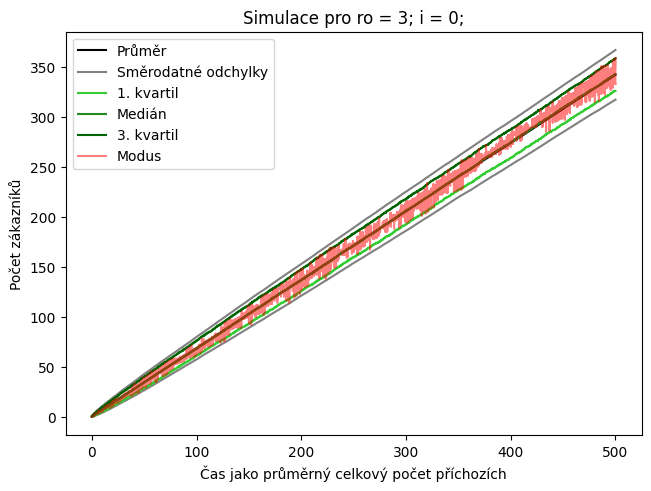

In [137]:
n_steps = 10000
n = np.linspace(0, maxNumberN, n_steps)
simsCount = 1000

# sim = simulation(n, rho, i)
mean, median, mode, SD, Q1, Q3  = simulationStats(simsCount, n, rho, i)

# limAvrage = rho/(1-rho)
# limSD = np.sqrt(rho/(1-rho)**2)

fig, ax = plt.subplots(layout='constrained')

plt.plot(n, mean, color='black', label='Průměr')
# plt.axhline(y=limAvrage, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.plot(n, mean+SD, color='grey', label='Směrodatné odchylky')
# plt.axhline(y=limAvrage+limSD, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.plot(n, mean-SD, color='grey')
# plt.axhline(y=limAvrage-limSD, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.plot(n, Q1, color='limegreen', label='1. kvartil')
plt.plot(n, median, color='forestgreen', label='Medián')
plt.plot(n, Q3, color='darkgreen', label='3. kvartil')

plt.plot(n, mode, color='red', label='Modus', alpha=0.5)

plt.legend(loc='best')
plt.title('Simulace pro ro = {rho}; i = {i};'.format(rho = rho, i = i))

ax.set_xlabel('Čas jako průměrný celkový počet příchozích')
ax.set_ylabel('Počet zákazníků')



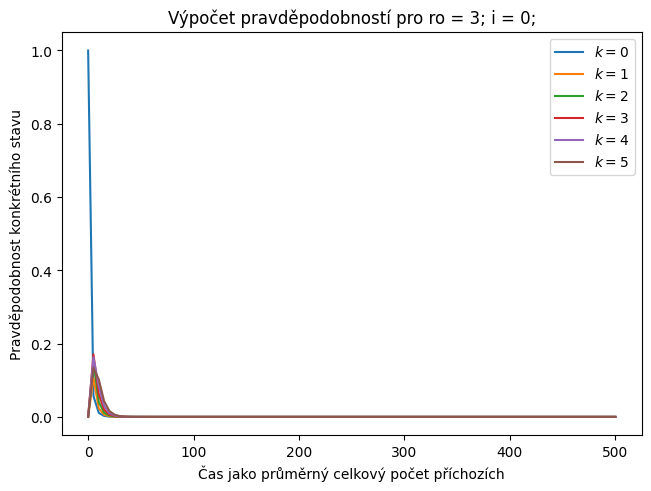

In [ ]:
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

fig, ax = plt.subplots(layout='constrained')

ax.set_ylim([0, 0.2])

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    # plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)


plt.legend(loc='best')
plt.title('Výpočet pravděpodobností pro ro = {rho}; i = {i};'.format(rho = rho, i = i))

ax.set_xlabel('Čas jako průměrný celkový počet příchozích')
ax.set_ylabel('Pravděpodobnost konkrétního stavu')

plt.show()


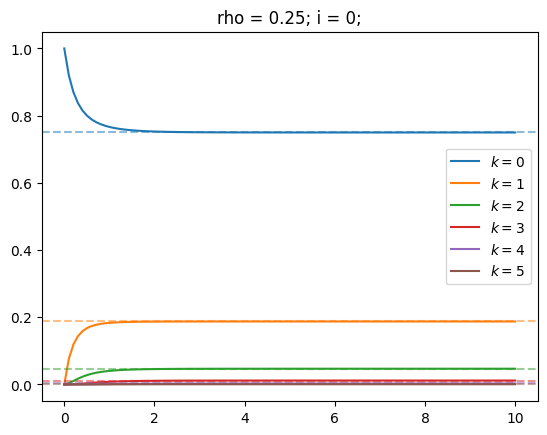

In [139]:
rho = 0.25
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


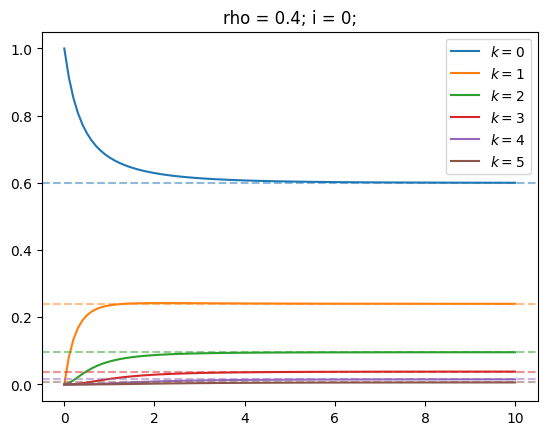

In [140]:
rho = 0.4
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


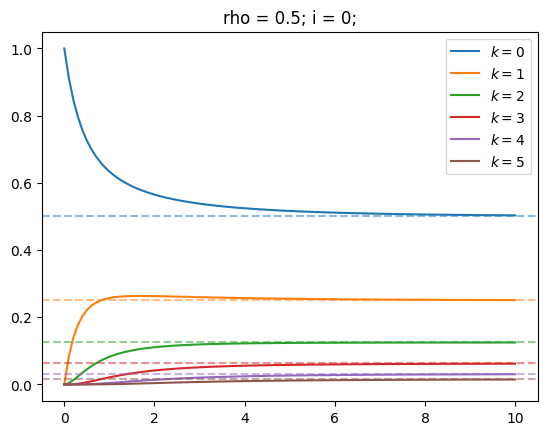

In [141]:
rho = 0.5
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


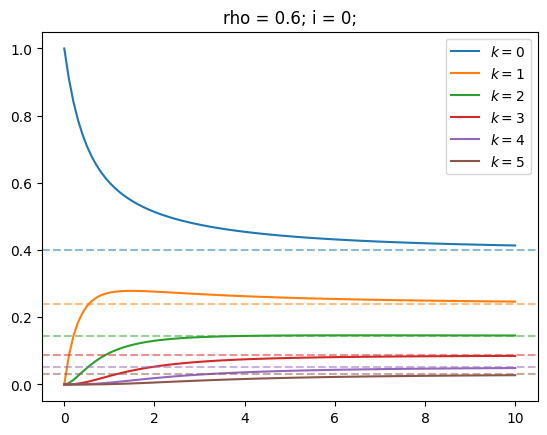

In [142]:
rho = 0.6
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


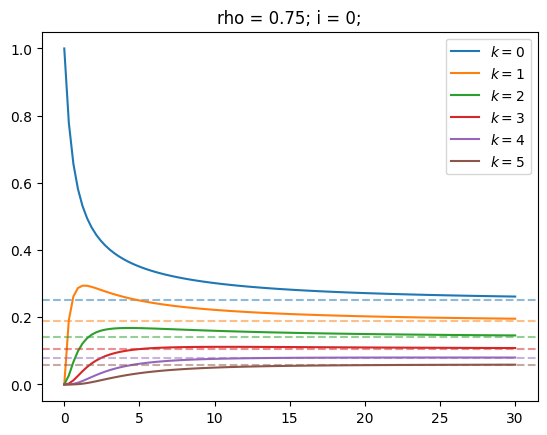

In [143]:
rho = 0.75
i = 0
maxNumberN = 30
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


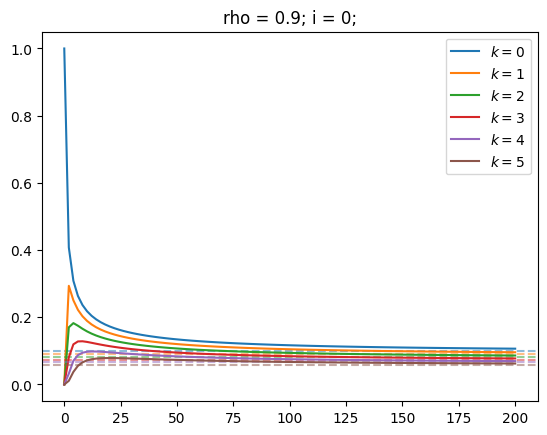

In [144]:
rho = 0.9
i = 0
maxNumberN = 200
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


KeyboardInterrupt: 

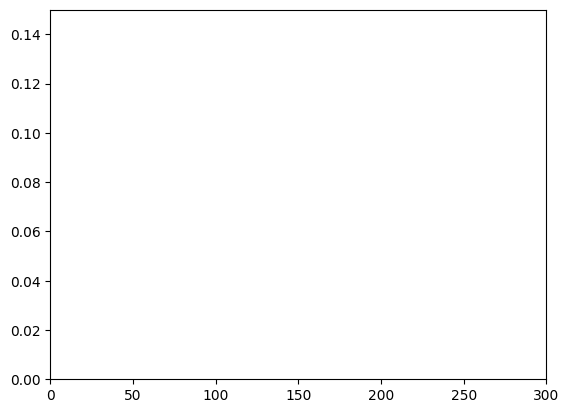

In [145]:
rho = 1
i = 0
maxNumberN = 300
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

ax = plt.gca()
ax.set_xlim([0, maxNumberN])
ax.set_ylim([0, 0.15])

for k in range(6):
    plt.plot(n, probK(k, n, rho, i))

plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))


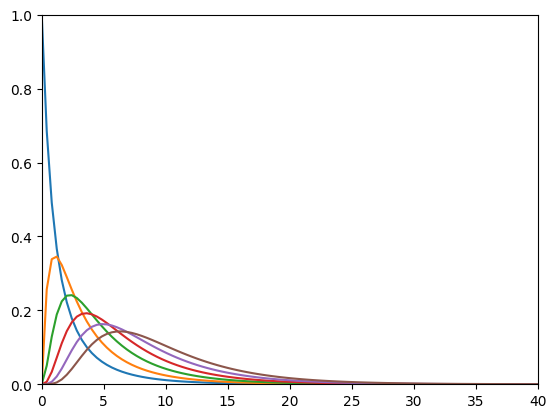

In [ ]:
rho = 3
i = 0
maxNumberN = 40
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

ax = plt.gca()
ax.set_xlim([0, maxNumberN])
ax.set_ylim([0, 1])

for k in range(6):
    plt.plot(n, probK(k, n, rho, i))

plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))


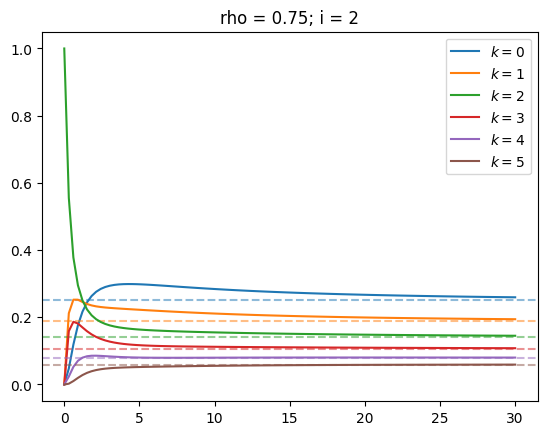

In [ ]:
rho = 0.75
i = 2
maxNumberN = 30
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()
